<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment7_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

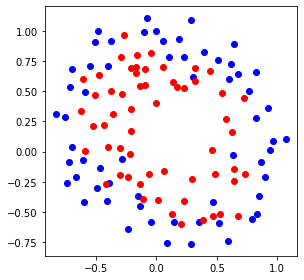

In [302]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
import math
# from google.colab import files

# uploaded = files.upload()

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [0]:
X = pointX #전체 x
y = np.array(pointY,dtype=float)
label = np.array(label,dtype=float)
# print(len(y))

In [304]:
%pylab inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [0]:
def sigmoid(z): 
  g = 1 / (1 + np.exp(-z)) 
  
  return g 
  
# print('sigmoid(10) = %s, sigmoid(-10) = %s, sigmoid(0) = %s' % (sigmoid(10), sigmoid(-10), sigmoid(0)))

In [0]:
def mapFeature(X1, X2): 
  degree =  9
  #print(X1.shape) 
  m = np.size(X1) 
  out = np.ones(m) 
  res = [] 
  
  res.append(out) 
  
  for i in np.arange(0, degree + 1): 
    for j in np.arange(0, degree + 1): 
      out1 = (X1 ** i) * (X2 ** j) 
      res.append(out1) 
      
  return np.array(res).T 

data = matrix(data)

X = data[:, 0:2] 
y = data[:, 2] 

X = np.array(X)
y = np.array(y)
      
X_reg = mapFeature(X[:, 0], X[:, 1]) 
# print(X_reg[0:2, :])

In [307]:
import scipy.optimize as op 

def myCostReg(theta, X, y, s_lambda): 
  
  X = matrix(X) 

  J = 0 
  grad = np.zeros(np.size(theta)) 
  m, n = X.shape 
  y = y.reshape((m, 1)) 
  theta = theta.reshape((n, 1)) 

  theta_0 = theta[0] 
  theta_j = theta[1:] 

  theta = np.matrix(theta) 
  sum_theta_square = np.sum(theta_j ** 2) 
  predictions = X * theta 
  sig_term = sigmoid(predictions)

  J = 1/m * sum(np.multiply(-y, log(sig_term)) - np.multiply((1 - y), log(1 - sig_term))) + s_lambda / (2 * m) * sum_theta_square 
  
  return J 
  
def myGradientReg(theta, X, y, s_lambda): 
 
  X = matrix(X) 

  J = 0 
  grad = np.zeros(np.size(theta)) 
  m, n = X.shape 
  y = y.reshape((m, 1)) 
  theta = theta.reshape((n, 1)) 

  theta_0 = theta[0] 
  theta_j = theta[1:] 
 
  theta = np.matrix(theta) 

  predictions = X * theta 
  sig_term = sigmoid(predictions) 

  errors = (sig_term - y) 

  delta_0 = 1/m * errors.T * X[:, 0] 

  delta = 1/m * errors.T * X[:, 1:]

  regular = s_lambda / m * theta_j 
  delta_j = delta.T + regular 
  grad[0] = delta_0 
  grad[1:] = delta_j.T 
   
  return grad.flatten() 
   
initial_theta = np.zeros((X_reg.shape[1], 1)) 

s_lambda = 0.00000001
Result = op.minimize(fun = myCostReg, x0 = initial_theta, args = (X_reg, y, s_lambda), method = 'TNC', jac = myGradientReg); 
cost = Result.fun 
theta = Result.x 

s_lambda2 = 1 
Result2 = op.minimize(fun = myCostReg, x0 = initial_theta, args = (X_reg, y, s_lambda2), method = 'TNC', jac = myGradientReg); 
cost2 = Result2.fun 
theta2 = Result2.x 

s_lambda3 = 1000
Result3 = op.minimize(fun = myCostReg, x0 = initial_theta, args = (X_reg, y, s_lambda3), method = 'TNC', jac = myGradientReg); 
cost3 = Result3.fun 
theta3 = Result3.x 

# theta[0] = theta_history[1500][0]
# theta[1] = theta_history[1500][1]
# theta[2] = theta_history[1500][2]
# theta[3] = theta_history[1500][3]
# theta[4] = theta_history[1500][4]
# theta[5] = theta_history[1500][5]
# theta[6] = theta_history[1500][6]
# theta[7] = theta_history[1500][7]
# theta[8] = theta_history[1500][8]
# theta[9] = theta_history[1500][9]
# theta[10] = theta_history[1500][10]
# theta[11] = theta_history[1500][11]
# theta[12] = theta_history[1500][12]
# theta[13] = theta_history[1500][13]
# theta[14] = theta_history[1500][14]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


In [0]:
def predict(theta, X): 
  m = matrix(X) 
  m, n = X.shape 
  theta = theta.reshape((n, 1)) 
  theta = matrix(theta) 
  p = np.zeros((m, 1)) 
  p = sigmoid(X * theta) >= 0.5; 
  
  return p 

In [0]:
p = predict(theta, X_reg) 
p2 = predict(theta2, X_reg) 
p3 = predict(theta3, X_reg) 

In [0]:
def plotBoundary(theta, X, y, line_color): 
  
  if np.size(X, 1) <= 3: 
    plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1] + 2)]) 
    plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0]) 
    plot(plot_x, plot_y) 
    plt.legend(('Admitted', 'Not admitted'), loc='upper right') 
  
  else: 

    u = linspace(-1, 1.5, 80) 
    v = linspace(-1, 1.5, 80) 
    z = np.zeros((np.size(u), np.size(v))) 

    for i in np.arange(np.size(u)): 
      for j in np.arange(np.size(v)): 
        z[i, j] = np.sum(mapFeature(u[i], v[j]) * theta) 
        
        z = z.T 

    # plt.figure()
    # plt.scatter(pointX0, pointY0, c='b')
    # plt.scatter(pointX1, pointY1, c='r')
    # plt.tight_layout()
    # plt.gca().set_aspect('equal', adjustable='box')
    plt.contour(u, v, z, colors=line_color) 

In [0]:
# accuracy_history = np.zeros(1500)

# for i in range(1500):
#   p = predict(theta_history[i], X_reg) 
#   accuracy_history[i] = np.mean(double(p == y))

# accuracy_history2 = np.zeros(1500)

# for i in range(1500):
#   p2 = predict(theta_history2[i], X_reg) 
#   accuracy_history2[i] = np.mean(double(p2 == y))

# accuracy_history3 = np.zeros(1500)

# for i in range(1500):
#   p3 = predict(theta_history3[i], X_reg) 
#   accuracy_history3[i] = np.mean(double(p3 == y))

In [0]:
# fig,ax = plt.subplots(figsize=(12,8))

# ax.set_ylabel('accuracy')
# ax.set_xlabel('Iterations')
# _=ax.plot(range(1500),accuracy_history,'r.')

In [0]:
# fig,ax = plt.subplots(figsize=(12,8))

# ax.set_ylabel('accuracy')
# ax.set_xlabel('Iterations')
# _=ax.plot(range(1500),accuracy_history,'r.', color = 'red')
# _=ax.plot(range(1500),accuracy_history2,'r.', color = 'green')
# _=ax.plot(range(1500),accuracy_history3,'r.', color = 'blue')

In [314]:
# print("Train Accuracy:  ", end=' ')
# print(accuracy_history[-1]*100, end='%')
# print("Train Accuracy:  ", end=' ')
# print(accuracy_history2[-1]*100, end='%')
# print("Train Accuracy:  ", end=' ')
# print(accuracy_history3[-1]*100, end='%')
print("Train Accuracy:  ", end=' ')
a = np.mean(double(p == y))
print(a*100, end='%')
print("Train Accuracy:  ", end=' ')
a = np.mean(double(p2 == y))
print(a*100, end='%')
print("Train Accuracy:  ", end=' ')
a = np.mean(double(p3 == y))
print(a*100, end='%')

Train Accuracy:   94.91525423728814%Train Accuracy:   83.05084745762711%Train Accuracy:   50.847457627118644%

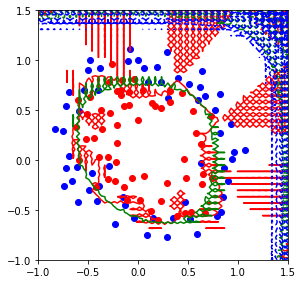

In [315]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

plotBoundary(theta, X_reg, y, 'red')
plotBoundary(theta2, X_reg, y, 'green')
plotBoundary(theta3, X_reg, y, 'blue')